In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df['Total_spend']=df['TV']+df['Radio']+df['Newspaper']

In [7]:
df.head()

,TV,Radio,Newspaper,Sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_spend', ylabel='Sales'>

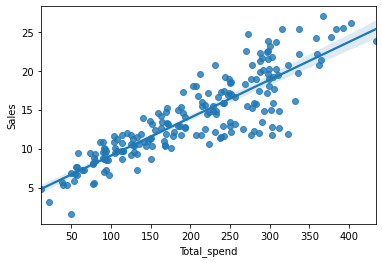

In [8]:
sns.regplot(data=df,x='Total_spend',y='Sales')

In [9]:
x=df['Total_spend']
y=df['Sales']

In [10]:
np.polyfit(x,y,deg=1)

array([0.04868788, 4.24302822])

In [11]:
potential=np.linspace(0,500,100)

In [12]:
predwction=0.04868788*potential+4.24302822

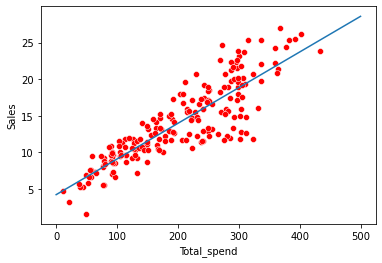

In [13]:
sns.scatterplot(x='Total_spend',y='Sales',data=df,color='red')
plt.plot(potential,predwction)


In [14]:
Spend=200

predection_sale=0.04868788*Spend+4.24302822

In [15]:
predection_sale

13.98060422

In [16]:
np.polyfit(x,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
pot_spend=np.linspace(0,500,100)

In [18]:
pred_sale=3.07615033e-07*pot_spend**3+-1.89392449e-04*pot_spend**2+8.20886302e-02*pot_spend+ 2.70495053e+00

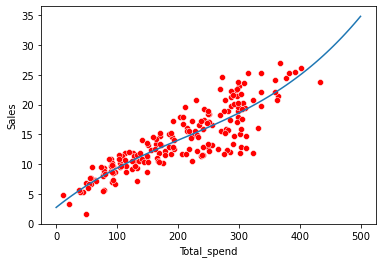

In [19]:
sns.scatterplot(x='Total_spend',y='Sales',data=df,color='red')
plt.plot(pot_spend,pred_sale)

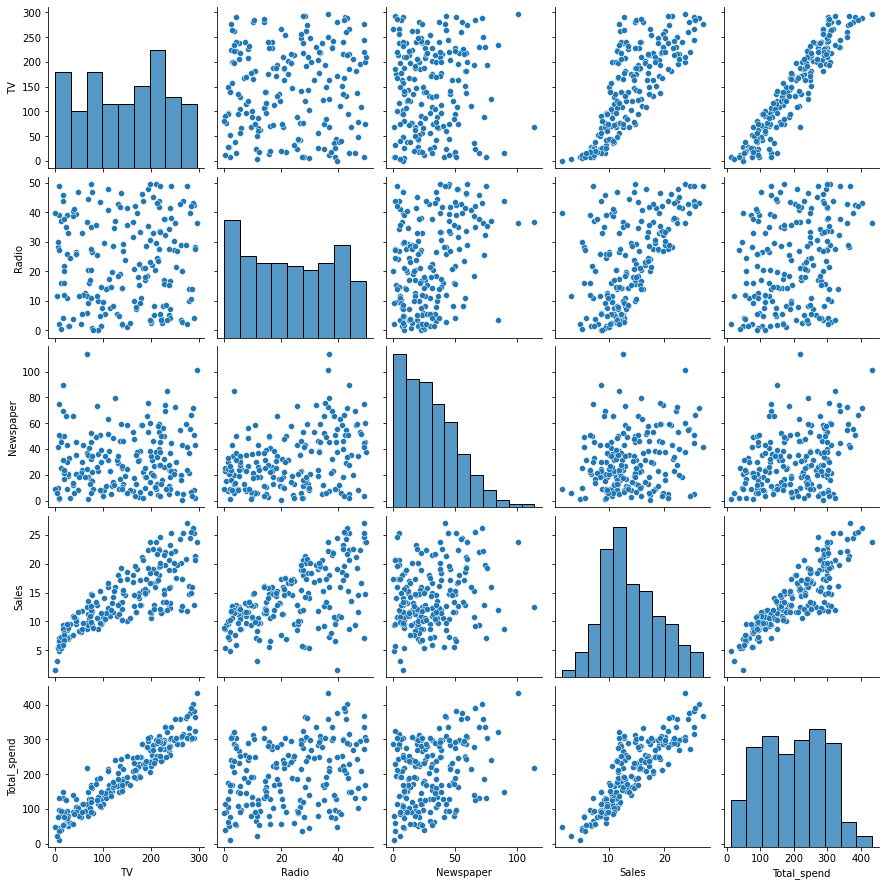

In [20]:
sns.pairplot(data=df)

In [21]:
df.drop('Total_spend',axis=1,inplace=True)

In [22]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
x=df.drop('Sales',axis=1)

In [24]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
y=df['Sales']

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [28]:
len(df)

200

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
pred=model.predict(x_test)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
mean_absolute_error(y_test,pred)

1.2137457736144808

In [39]:
mean_squared_error(y_test,pred)

2.2987166978863773

In [40]:
np.sqrt(mean_squared_error(y_test,pred))

1.5161519375993877

In [41]:
residual=y_test - pred 

In [54]:
#residual

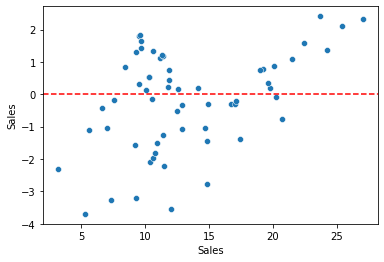

In [42]:
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0,color='red',ls='--')

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

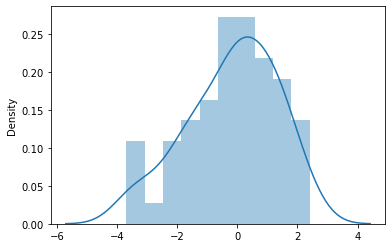

In [43]:
sns.distplot(x=residual,bins=10)

In [44]:
finel_model=LinearRegression()

In [45]:
finel_model.fit(x,y)

LinearRegression()

In [46]:
finel_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])